In [1]:
import pandas as pd
%matplotlib inline

In [2]:
train_toxic = pd.read_csv("train.csv")

In [3]:
train_toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
import seaborn as sn

In [5]:
sn.set(style="whitegrid")

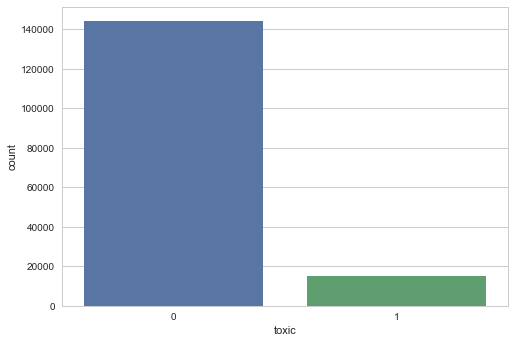

In [6]:
countplot=sn.countplot(x="toxic",data=train_toxic)

In [7]:
fig=countplot.get_figure()
fig.show

In [8]:
fig.savefig("output.png")

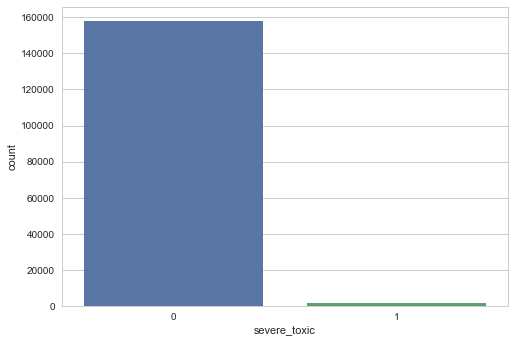

In [47]:
countplot=sn.countplot(x="severe_toxic",data=train_toxic)

In [ ]:
countplot.s

In [10]:
pd.crosstab(train_toxic["threat"],columns="count")

col_0,count
threat,
0,159093
1,478


In [11]:
pd.pivot_table(aggfunc="sum",index=['obscene'],data=train_toxic)

,identity_hate,insult,severe_toxic,threat,toxic
obscene,,,,,
0,373,1722,78,177,7368
1,1032,6155,1517,301,7926


In [12]:
train_toxic.shape

(159571, 8)

In [13]:
pd.pivot_table(aggfunc="sum",index=['toxic'],data=train_toxic)

,identity_hate,insult,obscene,severe_toxic,threat
toxic,,,,,
0,103,533,523,0,29
1,1302,7344,7926,1595,449


In [14]:
COLUMNS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train_toxic[COLUMNS].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [15]:
df_comb = train_toxic.groupby(COLUMNS)\
                    .size()\
                    .sort_values(ascending=False)\
                    .reset_index()\
                    .rename(columns={0: 'count'})
df_comb.head(n=10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,count
0,0,0,0,0,0,0,143346
1,1,0,0,0,0,0,5666
2,1,0,1,0,1,0,3800
3,1,0,1,0,0,0,1758
4,1,0,0,0,1,0,1215
5,1,1,1,0,1,0,989
6,1,0,1,0,1,1,618
7,0,0,1,0,0,0,317
8,0,0,0,0,1,0,301
9,1,1,1,0,1,1,265


In [16]:
df_comb = train_toxic.groupby(COLUMNS)\
                    .size()\
                    .sort_values(ascending=False)\
                    .reset_index()\
                    .rename(columns={0: 'count'})

In [17]:
train_toxic.groupby(COLUMNS).size().sort_values(ascending=False).reset_index()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,0
0,0,0,0,0,0,0,143346
1,1,0,0,0,0,0,5666
2,1,0,1,0,1,0,3800
3,1,0,1,0,0,0,1758
4,1,0,0,0,1,0,1215
5,1,1,1,0,1,0,989
6,1,0,1,0,1,1,618
7,0,0,1,0,0,0,317
8,0,0,0,0,1,0,301
9,1,1,1,0,1,1,265


In [18]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')



In [19]:
from collections import OrderedDict
from collections import defaultdict
def findMostUsedWords(df,column_name,value,mydict):
    wordtokens=df.tokens[train_toxic[column_name]==value]
    for words  in wordtokens:
        for word in words:
            mydict[word]+=1
    
    return OrderedDict(sorted(mydict.items(),reverse=True,key=lambda item:item[1]))


In [20]:
import re
import nltk
from nltk.corpus import stopwords

In [21]:
import string
import itertools 
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
def preprocess_narrative( narrative ,lowercase,remove_stops,stemming,lemmatization):
    preprocess_list = list()
    
    for text in narrative:
        letters_only = re.sub(r'\n',r' ',text)
        letters_only = re.sub("[^a-zA-Z]", " ", text) 
        letters_only = letters_only.replace("Fucking","fuck")
        letters_only = letters_only.replace("fucking","fuck")
       
        
        if lowercase:
            letters_only = " ".join([w.lower() for w in letters_only.split()])
        
        if remove_stops:
            letters_only = " ".join([w for w in letters_only.split() if w not in stop_words])
        
        if stemming:
            st = PorterStemmer()
            letters_only = " ".join([st.stem(w) for w in letters_only.split()])
        
        if lemmatization:
            wordnet_lemmatizer = WordNetLemmatizer()
            letters_only = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in letters_only.split()])
       
        preprocess_list.append(letters_only) 
    return preprocess_list   

In [22]:
no_label = train_toxic[(train_toxic['toxic'] ==0) & (train_toxic['severe_toxic'] ==0) & (train_toxic['obscene'] ==0)
                       & (train_toxic['threat'] ==0) & (train_toxic['insult'] ==0) & (train_toxic['identity_hate'] ==0)]
with_label=train_toxic[(train_toxic['toxic'] !=0) | (train_toxic['severe_toxic'] !=0) | (train_toxic['obscene'] !=0) 
                | (train_toxic['threat'] !=0) | (train_toxic['insult'] !=0) | (train_toxic['identity_hate'] !=0)]
with_label=with_label.append(no_label[:17000])

train_datadf=with_label.sample(frac=1)

In [23]:
train_datadf['newcomment'] = preprocess_narrative(train_datadf.comment_text,True,True,True,True)

In [24]:
train_datadf["tokens"] = train_datadf["newcomment"].apply(tokenizer.tokenize)


In [25]:
for col_name in COLUMNS:
    mydict=defaultdict(int)
    print(col_name,list(findMostUsedWords(train_datadf,col_name,1,mydict).items())[:5])

toxic [('fuck', 13448), ('suck', 4806), ('go', 3988), ('like', 3699), ('wikipedia', 3688)]
severe_toxic [('fuck', 8802), ('suck', 3522), ('ass', 2121), ('shit', 1890), ('u', 1611)]
obscene [('fuck', 13251), ('suck', 4196), ('shit', 3236), ('ass', 2875), ('nigger', 2839)]
threat [('die', 1178), ('ass', 772), ('kill', 522), ('go', 379), ('fuck', 312)]
insult [('fuck', 10866), ('suck', 3839), ('nigger', 2892), ('go', 2628), ('faggot', 2534)]
identity_hate [('nigger', 3089), ('jew', 1499), ('fuck', 1437), ('fat', 1322), ('gay', 939)]


In [26]:
train_datadf.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,newcomment,tokens
10579,1bf0575691691b3a,"""\n\nAnother likely conflict of interest matte...",0,0,0,0,0,0,anoth like conflict interest matter respect ri...,"[anoth, like, conflict, interest, matter, resp..."
13168,22da6c01142589f7,"You are welcome. It was good fun, I learnt a l...",0,0,0,0,0,0,welcom good fun learn lot appreci encourag rel...,"[welcom, good, fun, learn, lot, appreci, encou..."
86922,e87a3f65b00b858d,"This article is C-Class for a reason, it's a p...",1,0,1,0,1,0,articl c class reason piec shit yank cunt dont...,"[articl, c, class, reason, piec, shit, yank, c..."
4337,0b879d3e0dbce593,"pervert, \n\nps karl swithwnbank wrothe this n...",1,0,0,0,1,0,pervert ps karl swithwnbank wroth littledan,"[pervert, ps, karl, swithwnbank, wroth, little..."
83317,deea4cd724020ebc,LOSER QUESTION \n\nAny reason why you can't mi...,1,0,1,0,1,0,loser question reason mind fuck busi ever kiss...,"[loser, question, reason, mind, fuck, busi, ev..."


In [27]:
import itertools
import os
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow.contrib.keras.python import keras
from keras.models import Sequential
from keras.preprocessing import  text,sequence
from keras.layers import Dense,Activation,Dropout
from keras import layers

from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [28]:
tokenize = text.Tokenizer()

In [29]:
train_datadf.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,newcomment,tokens
10579,1bf0575691691b3a,"""\n\nAnother likely conflict of interest matte...",0,0,0,0,0,0,anoth like conflict interest matter respect ri...,"[anoth, like, conflict, interest, matter, resp..."
13168,22da6c01142589f7,"You are welcome. It was good fun, I learnt a l...",0,0,0,0,0,0,welcom good fun learn lot appreci encourag rel...,"[welcom, good, fun, learn, lot, appreci, encou..."
86922,e87a3f65b00b858d,"This article is C-Class for a reason, it's a p...",1,0,1,0,1,0,articl c class reason piec shit yank cunt dont...,"[articl, c, class, reason, piec, shit, yank, c..."
4337,0b879d3e0dbce593,"pervert, \n\nps karl swithwnbank wrothe this n...",1,0,0,0,1,0,pervert ps karl swithwnbank wroth littledan,"[pervert, ps, karl, swithwnbank, wroth, little..."
83317,deea4cd724020ebc,LOSER QUESTION \n\nAny reason why you can't mi...,1,0,1,0,1,0,loser question reason mind fuck busi ever kiss...,"[loser, question, reason, mind, fuck, busi, ev..."


In [30]:
tokenize.fit_on_texts(train_datadf['newcomment']) 

In [53]:
print(tokenize.word_index)

{'gypten': 38339, 'arrow': 5444, 'bitch': 47, 'chatm': 13369, 'ticcnr': 34730, 'cbt': 20098, 'jab': 9291, 'aiyee': 20444, 'cognoscenti': 34859, 'pytyu': 36840, 'triumphalist': 21929, 'uncrit': 8804, 'palmar': 32237, 'churhil': 44992, 'concert': 3797, 'joker': 4440, 'kama': 43851, 'maneuvr': 36498, 'funki': 16771, 'lasik': 42774, 'unnecesssari': 35683, 'youth': 2416, 'virtuou': 14554, 'duchess': 8349, 'plese': 19196, 'shittttttttt': 16684, 'carrio': 43120, 'rivera': 11270, 'talento': 43013, 'babyloon': 28883, 'minus': 30921, 'levitski': 26317, 'antarctica': 11252, 'bd': 5220, 'dolan': 45581, 'stl': 31748, 'kinow': 42719, 'newyork': 11132, 'brockington': 31108, 'leanr': 42013, 'wl': 14392, 'cedff': 21174, 'schmidt': 12677, 'crocheti': 28104, 'kyri': 43709, 'bakr': 28029, 'dvdm': 10176, 'thumper': 14059, 'expresso': 16751, 'boro': 33576, 'carniv': 9547, 'nonmuslim': 10970, 'puncharoo': 11704, 'rep': 4206, 'shred': 6732, 'jeaffreson': 38877, 'pwg': 27788, 'euromaidan': 44242, 'rosenberg': 

In [49]:
sequences=tokenize.texts_to_sequences(train_datadf['newcomment'])
MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 200000 #200000

In [50]:
train_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

[[158,
  6,
  647,
  185,
  265,
  414,
  3358,
  4270,
  8746,
  918,
  36,
  2287,
  72,
  3299,
  8747,
  217,
  1212,
  794,
  192,
  14,
  2921,
  74,
  125,
  95,
  11093,
  616,
  665,
  1881,
  5,
  2,
  59,
  876,
  8746,
  918,
  131,
  3358,
  4270,
  712,
  966,
  98,
  4270,
  193,
  712,
  966,
  918,
  31,
  193,
  4270,
  5603,
  1088,
  8748,
  8746,
  2402,
  23106,
  1424,
  1856,
  1334,
  11094,
  8746,
  269,
  953,
  16309,
  333,
  8746,
  918,
  3,
  11093,
  22,
  854,
  51,
  596,
  181,
  558,
  1657,
  122,
  2,
  151,
  686,
  11093,
  643,
  4389,
  43,
  775,
  8749,
  8749,
  12,
  25,
  539,
  356,
  221,
  5171,
  918,
  8748,
  263,
  1307,
  363,
  3358,
  4270,
  982,
  775,
  8749,
  3358,
  4270,
  548,
  5604,
  844,
  1532,
  3408,
  1154,
  616,
  11093,
  1353,
  158,
  70,
  60,
  13061,
  876,
  4270,
  223],
 [237, 49, 635, 369, 285, 498, 1177, 3487, 1482, 341, 243, 428, 2],
 [2,
  245,
  713,
  82,
  181,
  24,
  2840,
  77,
  123,
  33,


In [34]:
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Embedding
from keras.layers.wrappers import Bidirectional
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers import Convolution1D, GlobalMaxPooling1D, GlobalAveragePooling1D,GlobalMaxPool1D
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,128,input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(6, activation='sigmoid'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          25600000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 100)          71600     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 306       
Total para

In [35]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
y = train_datadf[labels].values
model.fit(train_data, y, validation_split=0.3, epochs=2, batch_size=150)

Train on 23257 samples, validate on 9968 samples
Epoch 1/2
23257/23257 [==============================] - 173s 7ms/step - loss: 1.4988 - acc: 0.9655 - val_loss: 1.4235 - val_acc: 0.9745

In [36]:
test_toxic= pd.read_csv('test.csv')

In [42]:
test_toxic['newcomment'] = preprocess_narrative(test_toxic.comment_text,True,True,True,True)

In [43]:
testsequences=tokenize.texts_to_sequences(test_toxic['newcomment'])


In [44]:
test_data = pad_sequences(testsequences, maxlen=MAX_SEQUENCE_LENGTH)

In [45]:
pred = model.predict(test_data)

In [46]:
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission[labels] = pred

sample_submission.to_csv("result.csv", index=False)